# First 4 steps
1. Standardizing the data.
2. Constructing the covariance matrix.
3. Obtaining the eigenvalues and eigenvectors of the covariance matrix.
4. Sorting the eigenvalues by decreasing order to rank the eigenvectors.

In [1]:
import pandas as pd 
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                        'machine-learning-databases/wine/wine.data',
                        header=None)

In [9]:
from sklearn.model_selection import train_test_split

X , y = df_wine.iloc[:,1:].values , df_wine.iloc[:,0].values

X_train , X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.3,random_state= 0 , stratify= y)

#Standardize 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) #train standard scaler on train set
X_test_std = sc.transform(X_test) #Standardize X_test basd on X_train?? - maybe ask Lau. 

In [20]:
import numpy as np 
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n %s' % eigen_vals)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


The eigenvalues define
the magnitude of the eigenvectors, so we have to sort the eigenvalues by decreasing
magnitude; we are interested in the top k eigenvectors based on the values of
their corresponding eigenvalues.

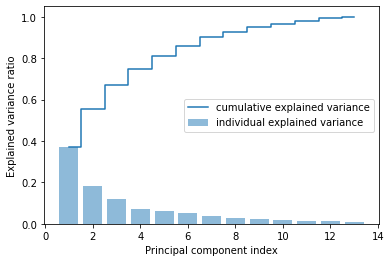

In [22]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
    sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Feature 1,2,3 accounts for roughly 60% of the variance.

# Next 3 steps
5. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ( k <= d ).
6. Construct a projection matrix W from the "top" k eigenvectors. 
7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

Or, in less technical terms, we will sort the eigenpairs by descending order of the
eigenvalues, construct a projection matrix from the selected eigenvectors, and use the
projection matrix to transform the data onto the lower-dimensional subspace.

In [23]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [26]:
w = np.hstack((eigen_pairs[0] [1][:,np.newaxis], 
                eigen_pairs[1] [1] [:,np.newaxis])) #Projection matrix with only two features. 

X_train_std[0].dot(w) #dot-product between X matrix and our projection matrix to transform into 2 dimensional. The more features in Projection matrix
# The more dimensions to your output. 
# [0] index by 0 to just gain cordinates for those first row. 

X_train_pca = X_train_std.dot(w) #calculate coordinates for all X rows. 

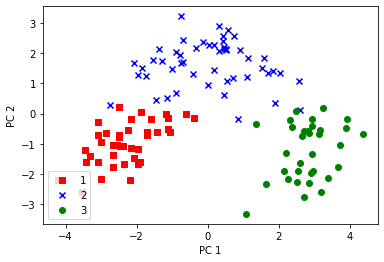

In [27]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers): 
    plt.scatter(X_train_pca[y_train==l, 0],
    X_train_pca[y_train==l, 1],
    c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Transforming something that maybe werent linearly seperable into something that is by reducing "noise" and multicoliniarity with PCA.  

# Doing PCA using scikit build in function

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/t7/ft1441ds18zf8wv47_702xpr0000gq/T/ipykernel_36660/570514143.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequenc

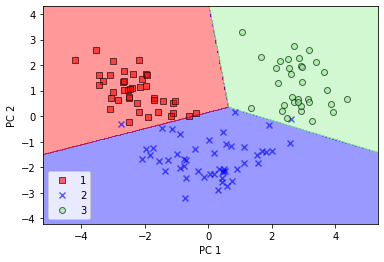

In [31]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
        # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.6,
            c = cmap(idx),
            edgecolor='black',
            marker = markers[idx],
            label=cl)
#regression and data-transformation. 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/t7/ft1441ds18zf8wv47_702xpr0000gq/T/ipykernel_36660/570514143.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequenc

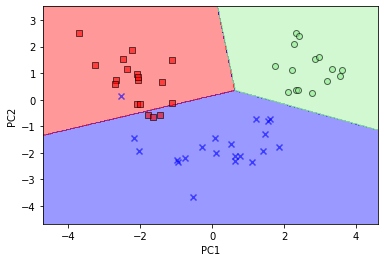

In [32]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [34]:
pca = PCA(n_components=None) # (n_components = none)so it doens't perform PCA but rather gives ratio. 
X_train_pca = pca.fit_transform(X_train_std) #returns new X values on the PCA selected features. 
pca.explained_variance_ratio_

array([[ 2.38299011,  0.45458499, -0.22703207, ...,  0.29726982,
         0.23489704, -0.40161994],
       [-1.96578183,  1.65376939,  1.38709268, ..., -0.14334855,
        -0.27213429, -0.0148829 ],
       [-2.53907598,  1.02909066,  1.32551841, ..., -0.15739501,
         0.64563779,  0.13835572],
       ...,
       [ 4.35308397,  0.66536041, -1.31737358, ..., -0.09152939,
         0.37706503,  0.38561142],
       [-1.84315373, -1.50688415,  0.24631395, ..., -0.17323527,
         0.86394227, -1.00559686],
       [-0.40860955, -1.29720607,  1.40315602, ...,  0.46153523,
         0.1071608 , -0.09379872]])

# LDA via. Scikit 

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/t7/ft1441ds18zf8wv47_702xpr0000gq/T/ipykernel_36660/570514143.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequenc

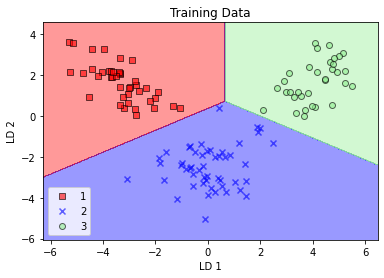

In [40]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.title("Training Data")
plt.legend(loc='lower left')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/t7/ft1441ds18zf8wv47_702xpr0000gq/T/ipykernel_36660/570514143.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequenc

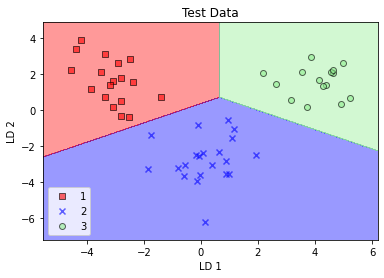

In [41]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.title("Test Data")
plt.legend(loc='lower left')
plt.show()